In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
diabetes_df = pd.read_csv('diabetes.csv')

In [3]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Missing values with the median
diabetes_df = diabetes_df.fillna(diabetes_df.median())

In [5]:
# Split data into features and target
X = diabetes_df.drop(['Outcome'], axis=1)
y = diabetes_df['Outcome']

In [6]:
# Scale features using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [7]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Train different machine learning algorithms
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

In [10]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(name + ':')
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-score:', f1)
    print('\n')

Logistic Regression:
Accuracy: 0.7532467532467533
Precision: 0.6491228070175439
Recall: 0.6727272727272727
F1-score: 0.6607142857142858


Decision Tree:
Accuracy: 0.7532467532467533
Precision: 0.6440677966101694
Recall: 0.6909090909090909
F1-score: 0.6666666666666665


Random Forest:
Accuracy: 0.7207792207792207
Precision: 0.6071428571428571
Recall: 0.6181818181818182
F1-score: 0.6126126126126126




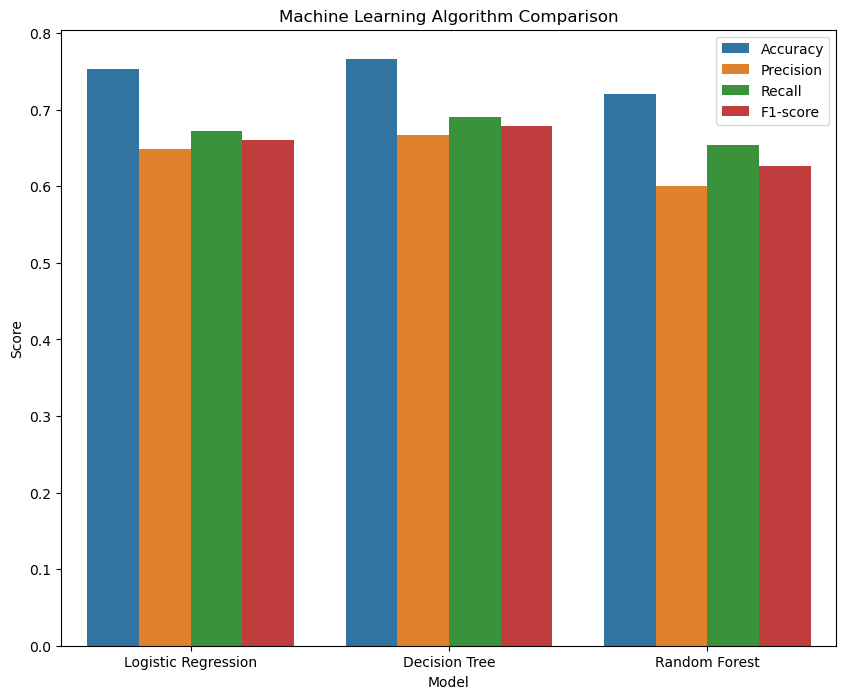

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a dictionary to store the results
results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': []}

# Loop through the models and add their results to the dictionary
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-score'].append(f1)

# Create a DataFrame from the dictionary
results_df = pd.DataFrame(results)

# Melt the DataFrame to make it easier to plot
melted_df = pd.melt(results_df, id_vars=['Model'], var_name='Metric', value_name='Score')

# Plot the results using a bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Model', y='Score', hue='Metric', data=melted_df)
plt.title('Machine Learning Algorithm Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()
